In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
!aws s3 cp s3://lowresolutionhighresolution/dataset/ . --recursive
!conda install python==3.7
cv2.__version__
!pip install --upgrade opencv-python==4.3.0.38

In [2]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
import tensorflow as tf

/home/ec2-user/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/OpenSSL/crypto.py:12: CryptographyDeprecationWarning: Python 2 is no longer supported by the Python core team. Support for it is now deprecated in cryptography, and will be removed in the next release.
  from cryptography import x509


In [4]:
from sagemaker import get_execution_role
role = get_execution_role()

In [5]:
bucket = 'arn:aws:s3:::lowresolutionhighresolution'

In [9]:
import boto3
conn = boto3.client('s3')
response = conn.list_buckets()

# Output the bucket names
print('Existing buckets:')
for bucket in response['Buckets']:
    print(bucket["Name"])
# contents = conn.list_objects(Bucket=bucket)['Contents']
# conn.list_objects(Bucket='lowresolutionhighresolution')

Existing buckets:
aws-emr-resources-128812368847-us-west-2
aws-logs-128812368847-us-west-2
elasticbeanstalk-us-west-2-128812368847
lowresolutionhighresolution
raphaelalabi.com


In [25]:
def load_data(path):
    high_res_images = []
    low_res_images = []
    for dirname, _, filenames in os.walk(path+'low_res'):
        for filename in filenames:
            img = cv2.imread(os.path.join(dirname, filename))
            img = process_image(img)
            low_res_images.append(img)
        
    for dirname, _, filenames in os.walk(path+'high_res'):
        for filename in filenames:
            img = cv2.imread(os.path.join(dirname, filename))
            img = process_image(img)
            high_res_images.append(img)
    
    return np.array(low_res_images), np.array(high_res_images)

def process_image(image):
    return image/255

In [30]:
base_dir = ''
train_x, train_y =  load_data(base_dir+'train/')
val_x, val_y = load_data(base_dir+'val/')

In [31]:
train_x.shape

(685, 256, 256, 3)

In [37]:
train_x[1]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [34]:
val_x.shape

(170, 256, 256, 3)

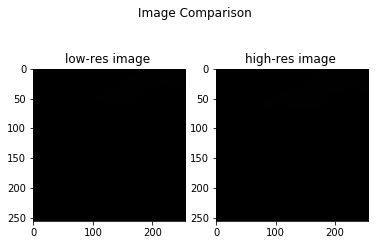

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Image Comparison')
ax1.imshow(train_x[1])
ax1.title.set_text("low-res image ")
ax2.imshow(train_y[1])
ax2.title.set_text("high-res image ")